# Face Detection And Recognition using OpenCV and deep learning

Sehajpreet Kaur 101803191 COE10 </br>
Simran Kaur 101803192 COE10 </br>
Tannishtha 101803201 COE10

# **Face Detection Using Deep learning**

In [1]:
pip install mtcnn # Multi-Task Cascaded Convolutional Neural Network

     |████████████████████████████████| 2.3MB 4.3MB/s 


Test image :


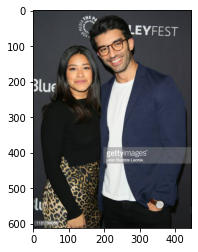

In [2]:
# Face detection with MTCNN on the test image
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

filename = 'test_img.jpg'
img_pixel = plt.imread(filename)

data = plt.imread(filename)
print("Test image :")
plt.imshow(data)

In [3]:
model_mtcnn = MTCNN()

# detect faces in the image
faces = model_mtcnn.detect_faces(img_pixel)
faces.reverse()
for face in faces:
	print(face)

{'box': [178, 61, 89, 109], 'confidence': 0.9995468258857727, 'keypoints': {'left_eye': (199, 111), 'right_eye': (236, 94), 'nose': (225, 129), 'mouth_left': (215, 147), 'mouth_right': (252, 131)}}
{'box': [92, 125, 75, 99], 'confidence': 0.9999486207962036, 'keypoints': {'left_eye': (112, 165), 'right_eye': (148, 163), 'nose': (132, 185), 'mouth_left': (116, 201), 'mouth_right': (149, 199)}}


In [4]:
def recognize_faces(filename, result_list):
  data = plt.imread(filename)
  plt.imshow(data)

  ax = plt.gca() # Get Current axis

  for result in result_list:
    x, y, width, height = result['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

  plt.show()

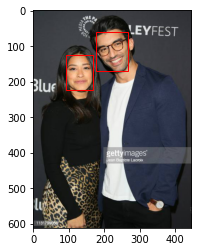

In [5]:
recognize_faces(filename, faces)

In [6]:
print("Total Number of faces detected : " ,len(faces))

Total Number of faces detected :  2


# **Encoding of the faces**

In [7]:
pip install opencv-python

In [8]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 74kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=44b29a7d46aff74093b7ab4de1bdbf4d231e4e71aaa76b0bc200351d0f78a864
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [9]:
from imutils import paths
import face_recognition
import cv2
import os
import pickle

In [10]:
!unzip Images.zip

Archive:  Images.zip
   creating: Images/ashley/
  inflating: Images/ashley/Ashley_Benson_2012.jpg  
  inflating: Images/ashley/d318be25d6a77a78cfbac9d8c160944f.jpg  
   creating: Images/diljit/
  inflating: Images/diljit/Diljit-Dosanjh-Photo.webp  
  inflating: Images/diljit/freepressjournal_2021-01_d595cf64-ce54-4346-ad91-68fc64392854_106135541_145880900417437_3025462609831799030_n.jpg  
   creating: Images/emily/
  inflating: Images/emily/525full-emily-baldoni.jpg  
  inflating: Images/emily/MV5BNzgwNjM4ZDMtM2MzMC00ZmM5LTkwYmItODFkMmJjZWVkMDAyXkEyXkFqcGdeQXVyMjQwMDg0Ng@@._V1_UY1200_CR104,0,630,1200_AL_.jpg  
   creating: Images/emma watson/
  inflating: Images/emma watson/emma_watson_acting_retirement_rumour_main.jpg  
  inflating: Images/emma watson/kushngff8Zpj7mIojT0D.jpg  
   creating: Images/justin/
  inflating: Images/justin/9d97f1dc1c45362c7bf83a112c158d54.jpg  
  inflating: Images/justin/justin-baldoni.jpg  
  inflating: Images/justin/justin-baldoni-faith-today-main-200417-1

In [11]:
imagePaths = list(paths.list_images('Images'))
imagePaths

['Images/justin/9d97f1dc1c45362c7bf83a112c158d54.jpg',
 'Images/justin/justin-baldoni.jpg',
 'Images/justin/justin-baldoni-faith-today-main-200417-1560174.jpg',
 'Images/ashley/d318be25d6a77a78cfbac9d8c160944f.jpg',
 'Images/ashley/Ashley_Benson_2012.jpg',
 'Images/diljit/freepressjournal_2021-01_d595cf64-ce54-4346-ad91-68fc64392854_106135541_145880900417437_3025462609831799030_n.jpg',
 'Images/emily/525full-emily-baldoni.jpg',
 'Images/emily/MV5BNzgwNjM4ZDMtM2MzMC00ZmM5LTkwYmItODFkMmJjZWVkMDAyXkEyXkFqcGdeQXVyMjQwMDg0Ng@@._V1_UY1200_CR104,0,630,1200_AL_.jpg',
 'Images/emma watson/emma_watson_acting_retirement_rumour_main.jpg',
 'Images/emma watson/kushngff8Zpj7mIojT0D.jpg']

In [12]:
knownEncodings = []
knownNames = []

In [13]:
for (i, imagePath) in enumerate(imagePaths):

    name = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    boxes = face_recognition.face_locations(rgb,model='hog')
    encodings = face_recognition.face_encodings(rgb, boxes)
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

data = {"encodings": knownEncodings, "names": knownNames}
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

In [14]:
print(data)

{'encodings': [array([-0.12459791,  0.11903614,  0.04133546, -0.0274979 , -0.09927709,
        0.08036064, -0.03359414, -0.04022533,  0.14391018, -0.0960374 ,
        0.13017607, -0.05587029, -0.23269033, -0.03870508, -0.10306954,
        0.11437301, -0.16024767, -0.17367139, -0.09670556, -0.09089357,
        0.11490789,  0.06223942, -0.0608454 ,  0.07454833, -0.20168455,
       -0.3083238 , -0.00313776, -0.06241115,  0.0010602 , -0.18884616,
        0.04856961,  0.03819449, -0.17261179,  0.05921642, -0.04701915,
        0.06675099,  0.0735969 , -0.04592682,  0.13696878,  0.05923483,
       -0.19983792,  0.11855587, -0.0278192 ,  0.2618992 ,  0.16283292,
        0.05906983, -0.00829788, -0.05229359,  0.17067169, -0.28224728,
        0.00696926,  0.18787771, -0.00551955,  0.02487057,  0.05922636,
       -0.17138812, -0.09101873,  0.13327698, -0.13379736,  0.07831734,
       -0.04897138, -0.03650329,  0.02688909, -0.09419811,  0.09402445,
        0.08285353, -0.13665181, -0.13081858,  0.

# **Recognising detected faces**

In [15]:
print("Recognizing Faces : ")

for i in range(len(faces)):

  x1, y1, width, height = faces[i]['box']
  x2 = x1 + width
  y2 = y1 + height
  face_data=img_pixel[y1:y2, x1:x2]

  rgb = cv2.cvtColor(face_data, cv2.COLOR_BGR2RGB)
  encoding = face_recognition.face_encodings(rgb)
  
  matches = face_recognition.compare_faces(data["encodings"],encoding[0])
  name = "Unknown"

  # check to see if we have found a match
  if True in matches:
      if matches[0]==True:
        matchedIdx=0
      elif matches[2]==True:
        matchedIdx=2
      elif matches[4]==True:
        matchedIdx=4
      name = data["names"][matchedIdx]
  print(name)

Recognizing Faces : 
justin
Unknown


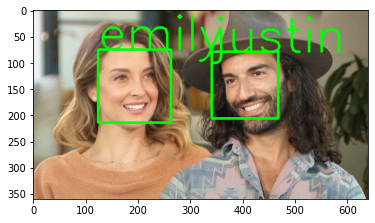

In [16]:
import face_recognition
import imutils
import pickle
import time
import cv2
import os

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")

data = pickle.loads(open('face_enc', "rb").read())

image = plt.imread("test_img_2.jpg")

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#convert image to Greyscale for haarcascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces_new = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(60, 60),flags=cv2.CASCADE_SCALE_IMAGE)
 
# the facial embeddings for face in input
encodings = face_recognition.face_encodings(rgb)
names = []

# loop over the facial embeddings incase
# we have multiple embeddings for multiple faces
for encoding in encodings:
    #Compare encodings with encodings in data["encodings"]
    #Matches contain array with boolean values and True for the embeddings it matches closely
    #and False for rest
    matches = face_recognition.compare_faces(data["encodings"],encoding)
    name = "Unknown"

    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}

        for i in matchedIdxs:
            #Check the names at respective indexes we stored in matchedIdxs
            name = data["names"][i]

            #increase count for the name we got
            counts[name] = counts.get(name, 0) + 1

            name = max(counts, key=counts.get)
 
        names.append(name)

        for ((x, y, w, h), name) in zip(faces_new, names):

            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 4)
            cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,3.0, (0, 255, 0), 4)
    plt.imshow(image)

# Thank you!